#Step 0: Import thư viện và đọc dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

## Chi dinh thu muc hien hanh
import os
colab_dir = '/content/gdrive/My Drive/Datasets'
my_dir    = '/Titanic'
path      = colab_dir + my_dir

## Chuyen thu muc hien hanh
%cd $path

Mounted at /content/gdrive
/content/gdrive/My Drive/Datasets/Titanic


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import warnings
from collections import Counter
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [ ]:
data = pd.read_csv(path+'/train.csv')

#Step 1: Data Understanding
Dataframe shape: Thấy được data chúng ta vừa load được nó có size như thế nào \\
Head/tail: Check nhanh dữ liệu ở các dòng đầu/cuối \\
dtypes: type của từng cột dữ liệu
describe


In [ ]:
data.shape

(891, 12)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Step 2: Data Preparation
Bỏ đi các cột không liên quan - Ở đây ta bỏ name - cabin - ticket - passengerid \\
Tạo biến mới/chỉnh sửa biến - thay đổi Sex và Embarked thành các biến có thang đo định danh \\
Tìm dữ liệu khuyết và điền/xóa nếu cần thiết \\
Nhận dạng cột trùng thông tin/đổi tên cột - Không thực hiện


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data = data[[#'PassengerId',
             'Survived', 
             'Pclass', 
             #'Name', 
             'Sex', 
             'Age', 
             'SibSp',
             'Parch', 
             #'Ticket', 
             'Fare', 
             #'Cabin', 
             'Embarked']].copy()

In [ ]:
data.shape

(891, 8)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
data.loc[data.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,female,NaN,0,0,7.7500,Q
76,0,3,male,NaN,0,0,7.8958,S
77,0,3,male,NaN,0,0,8.0500,S
87,0,3,male,NaN,0,0,8.0500,S
95,0,3,male,NaN,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,NaN,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st Quartile
        Q1 = np.percentile(df[c],25)
        # 3rd Quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # Detect Outlier and Their Indicies 
        outlier_list_col = df[(df[c]< Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store Indicies
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v>2)

    return multiple_outliers

In [ ]:
data.loc[detect_outliers(data,["Age","SibSp","Fare", "Parch"])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.0,3,2,263.00,S
88,1,1,female,23.0,3,2,263.00,S
159,0,3,male,NaN,8,2,69.55,S
180,0,3,female,NaN,8,2,69.55,S
201,0,3,male,NaN,8,2,69.55,S
324,0,3,male,NaN,8,2,69.55,S
341,1,1,female,24.0,3,2,263.00,S
792,0,3,female,NaN,8,2,69.55,S
846,0,3,male,NaN,8,2,69.55,S
863,0,3,female,NaN,8,2,69.55,S


In [ ]:
px.box(data, x="Pclass", y="Age")

In [ ]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        if Pclass == 2:
            return 29
            
        if Pclass == 3:
            return 24
            
    else:
            
        return Age

In [ ]:
data["Age"]= data[["Age","Pclass"]].apply(fill_age,axis =1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data.loc[data['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


<Axes: title={'center': 'Fare'}, xlabel='Embarked'>

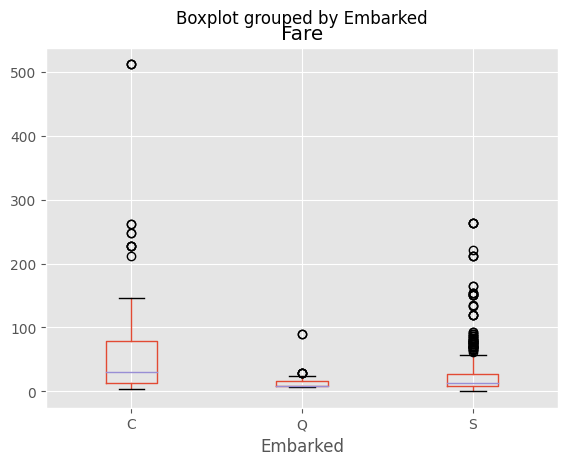

In [ ]:
data.boxplot(column="Fare",by = "Embarked")

In [ ]:
data['Embarked'] = data['Embarked'].fillna('C')

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1,'Q':2})
data["Sex"]=pd.get_dummies(data["Sex"],drop_first=True)

#Step 3: Mối quan hệ giữa các biến
Histogram \\
Biểu đồ phân tán - Scatter plot \\
Biểu đồ nhiệt hệ số tương quan - Heatmap Correlation \\
So sánh bởi các nhóm

In [ ]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.066409,0.523008,0.381594,32.204208,0.363636
std,0.486592,0.836071,0.477990,13.244532,1.102743,0.806057,49.693429,0.636159
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


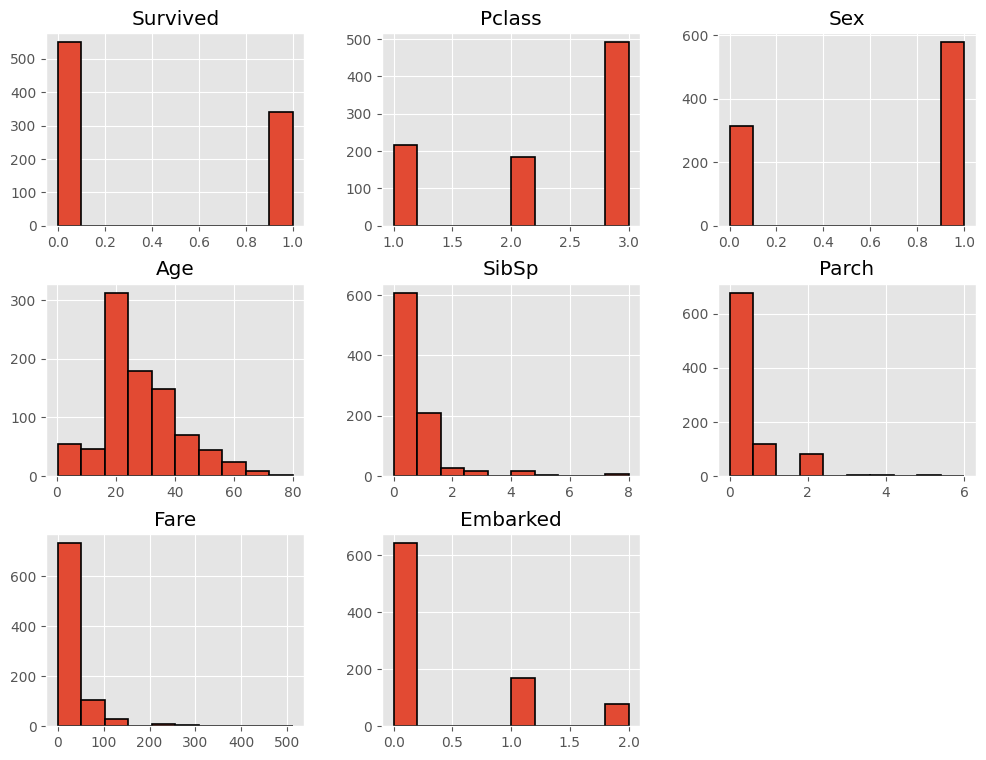

In [ ]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,9)
plt.show()

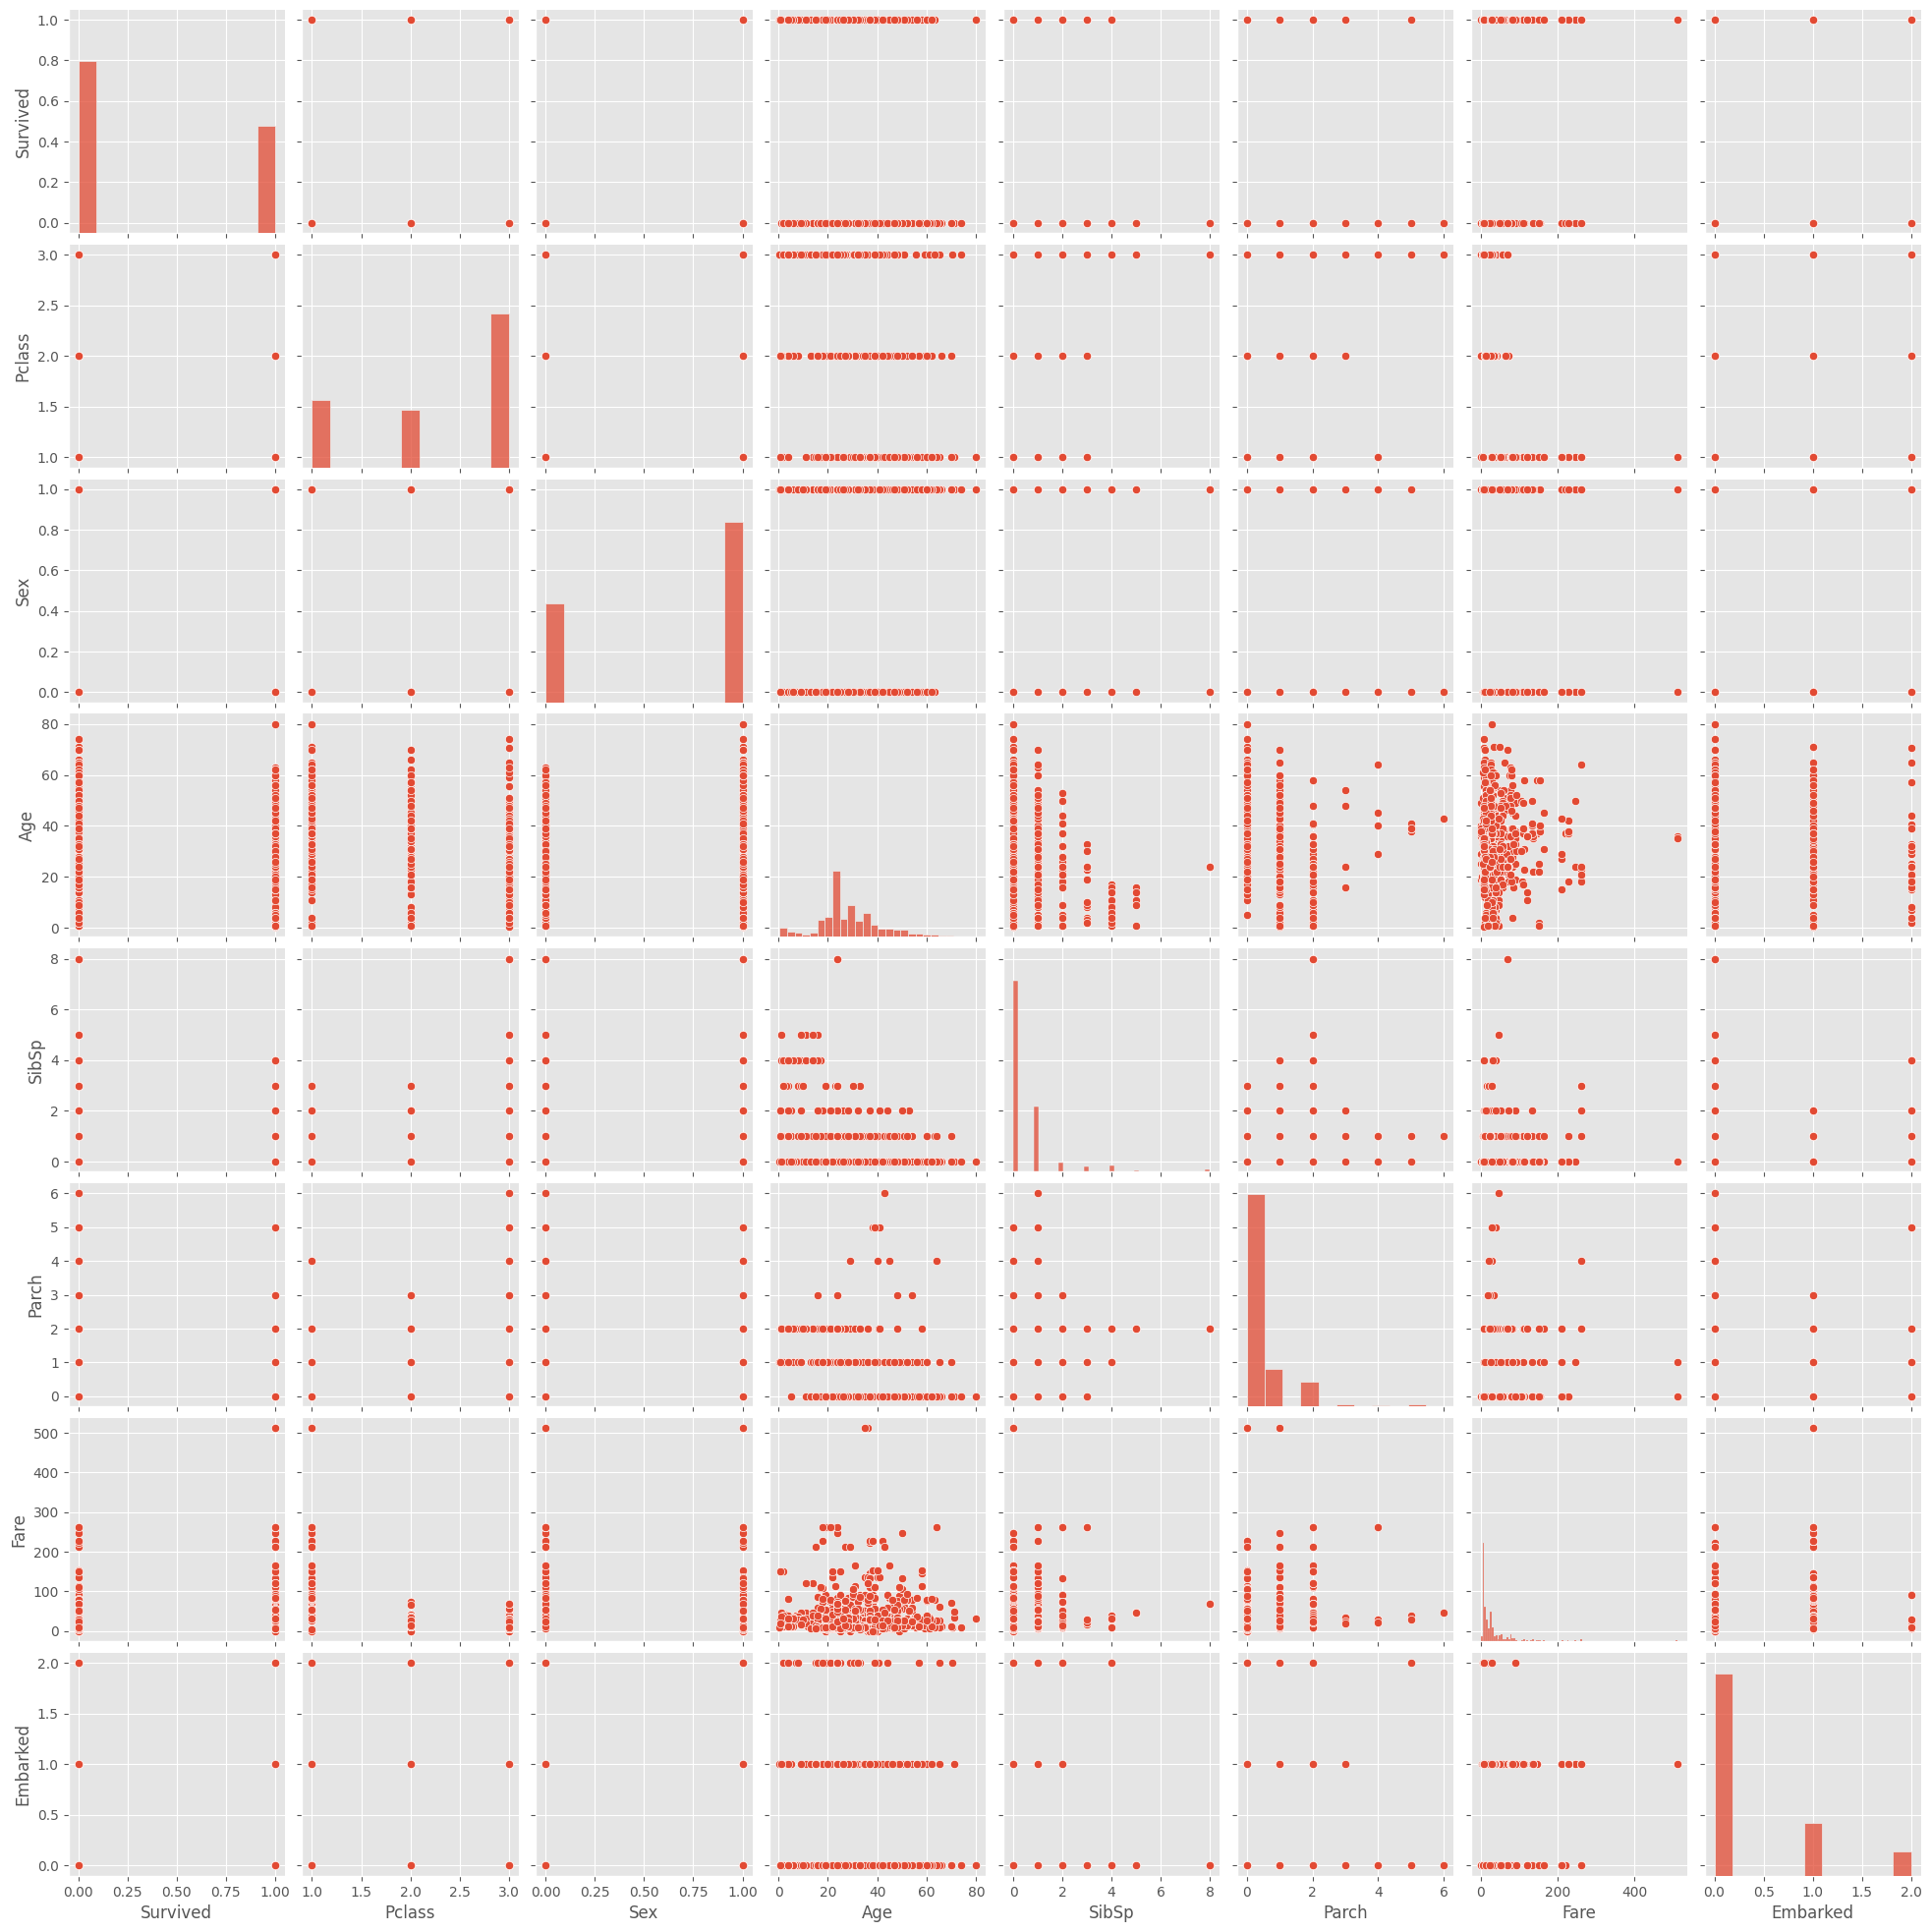

In [ ]:
sns.pairplot(data,
             vars= ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

<Axes: title={'center': 'Biểu đồ phân tán giữa tuổi và giá vé'}, xlabel='Fare', ylabel='Age'>

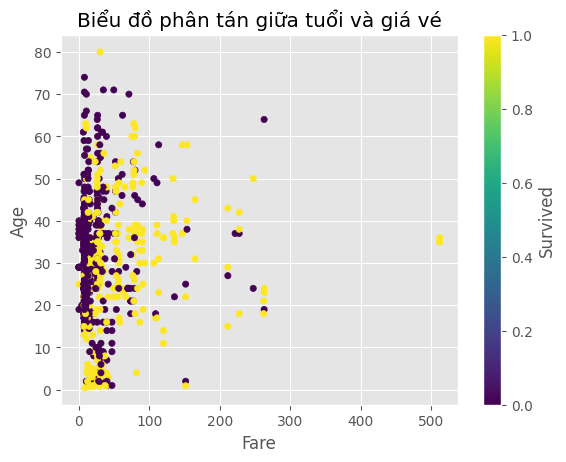

In [ ]:
data.plot(kind = 'scatter',
          x= 'Fare',
          y= 'Age',
          c = 'Survived',
          colormap='viridis',
          title = 'Biểu đồ phân tán giữa tuổi và giá vé')

<Axes: >

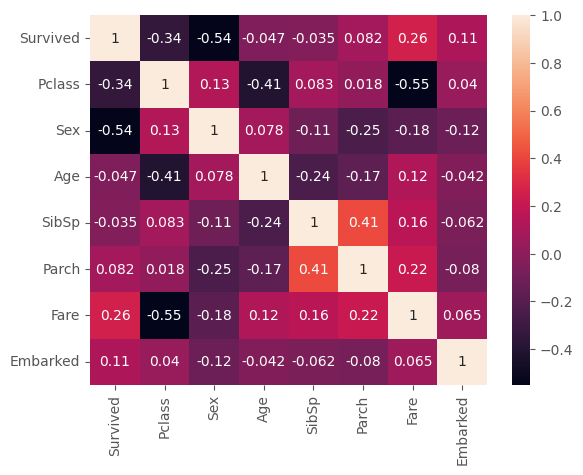

In [ ]:
df_corr = data.corr()
sns.heatmap(df_corr, annot= True)

In [ ]:
# Pclass - Survived
data[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
data[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [ ]:
# SibSp - Survived
data[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# Parch - Survived
data[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
data[["Embarked","Survived"]].groupby(["Embarked"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Embarked,Survived
1,1,0.558824
2,2,0.389610
0,0,0.336957
